In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', #'China', 'Germany',
                      'UK', 'France', 'Brazil',
                      #'S.Korea', 'Iran', 'Belgium', 'New Zealand', 
                       'Russia', 'Mexico']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'cyan', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan',
          'New Zealand': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Deaths = DF.copy()

In [9]:
Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,51797,774034,769331,170497,35400,28646,41454,30434,108536,15707,57023
2020-08-18,52888,780908,776203,171821,35405,28670,41466,30434,109888,15836,57774
2020-08-19,53866,787672,782966,173177,35412,28797,41483,30434,111100,15951,58481
2020-08-20,54849,793698,788989,174255,35418,28813,41489,30434,112304,16058,59106
2020-08-21,55794,799245,794536,175363,35427,28838,41491,30508,113358,16148,59610


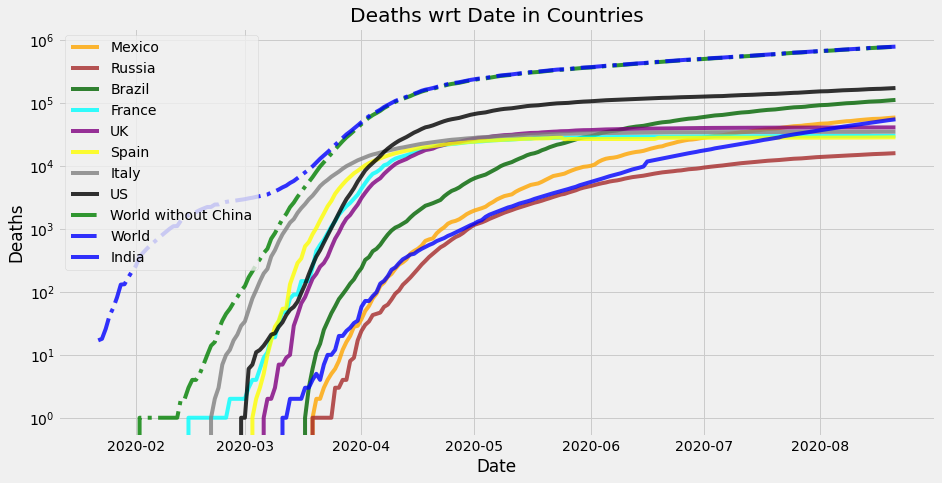

In [10]:
plotter(Deaths, 'Deaths')

In [11]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,918.50,6045.71,6043.50,1028.07,16.71,12.43,11.50,11.86,990.79,108.86,643.64
2020-08-18,935.21,6040.29,6038.21,1024.21,16.71,12.29,11.07,9.79,1004.93,107.79,636.07
2020-08-19,940.50,6026.57,6024.50,1023.07,16.50,21.29,11.29,9.79,988.86,106.14,627.36
2020-08-20,947.43,5993.79,5991.71,1010.79,16.50,22.36,10.43,9.00,986.50,105.64,613.50
2020-08-21,948.29,5940.14,5938.14,1001.14,16.93,23.93,9.71,12.93,984.71,103.57,592.79


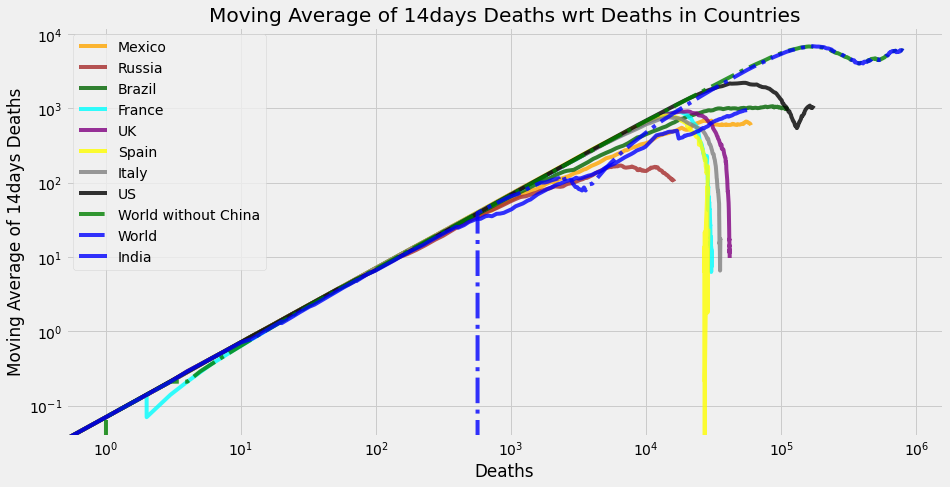

In [12]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [13]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,934,6153,6151,1005,27,10,10,15,969,105,574
2020-08-18,971,6218,6217,1042,27,13,10,15,980,105,549
2020-08-19,976,6240,6239,1020,27,31,10,8,986,103,545
2020-08-20,973,6210,6208,1021,27,30,8,6,977,101,545
2020-08-21,965,5553,5552,987,28,32,7,14,976,97,529


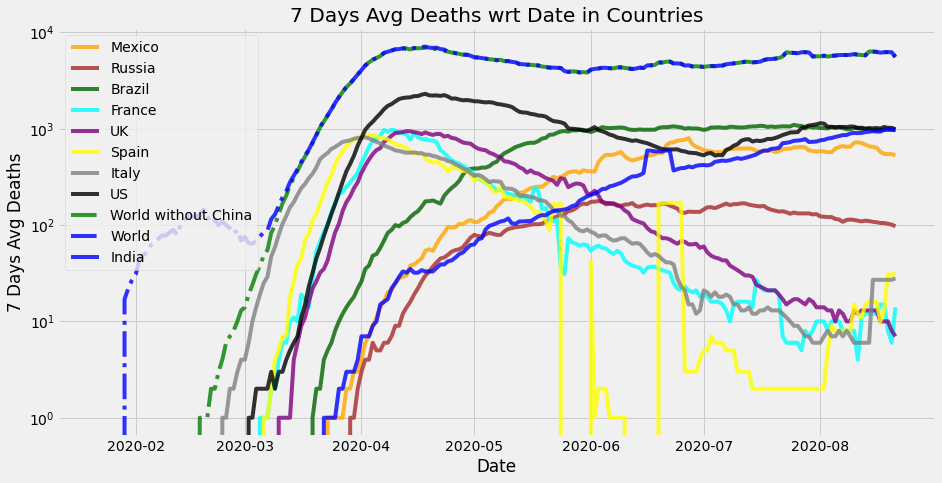

In [14]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [15]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,920,4553,4553,682,55,10,4,8,671,80,372
2020-08-18,969,5063,5063,780,4,18,7,8,885,84,410
2020-08-19,982,5923,5922,1042,5,60,11,8,1083,99,575
2020-08-20,1017,6555,6553,1253,6,56,12,0,1256,117,694
2020-08-21,969,6112,6111,1181,7,56,8,25,1157,104,612


In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,876,4130,4130,445,4,29,3,24,684,54,266
2020-08-18,1091,6874,6872,1324,5,24,12,0,1352,129,751
2020-08-19,978,6764,6763,1356,7,127,17,0,1212,115,707
2020-08-20,983,6026,6023,1078,6,16,6,0,1204,107,625
2020-08-21,945,5547,5547,1108,9,25,2,74,1054,90,504


In [17]:
Reproductivity = np.round(Weekly_Deaths/Biweekly_Deaths.shift(8), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  1.0964
World                  0.9584
World without China    0.9587
US                     0.9658
Italy                  3.9604
Spain                  2.7658
UK                     0.5507
France                 1.2975
Brazil                 0.9622
Russia                 0.8622
Mexico                 0.7969
Name: 2020-08-21 00:00:00, dtype: float64

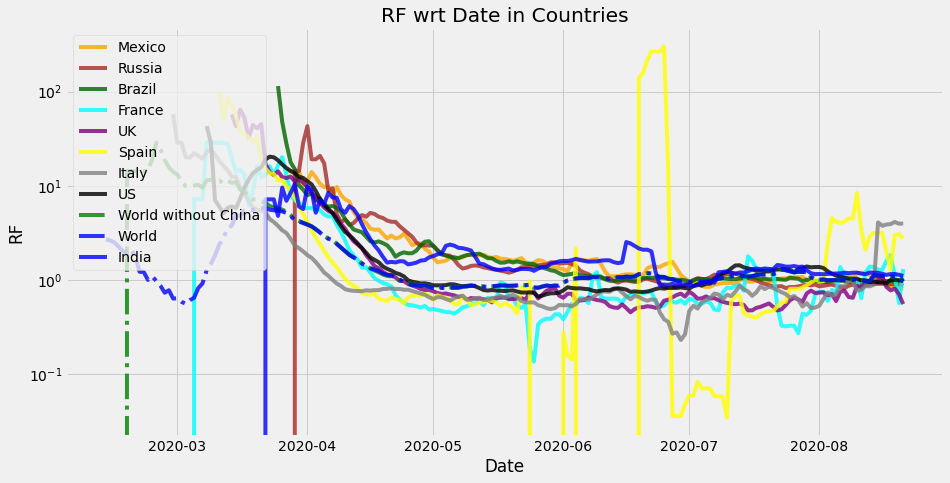

In [18]:
plotter(Reproductivity, 'RF')
pd.melt(Reproductivity).to_csv('CSVs/Reproductivity.csv')

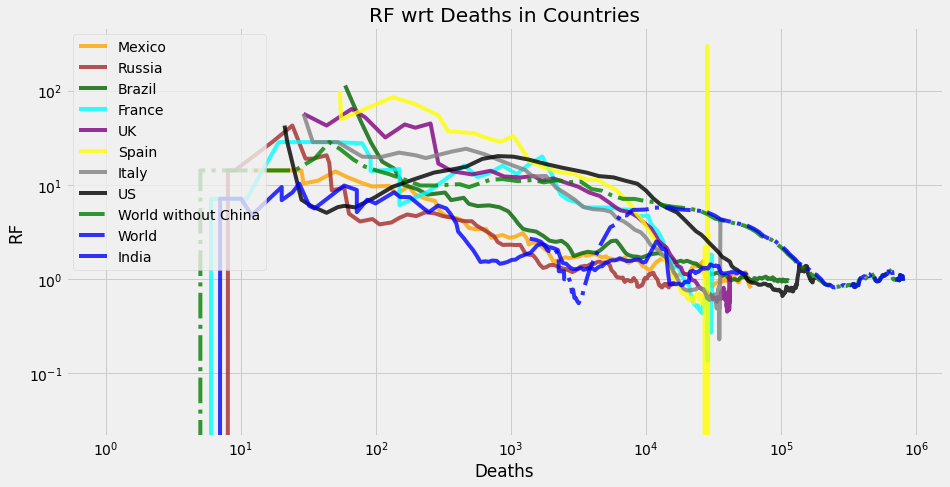

In [19]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [20]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [21]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Weekly Deaths': Weekly_Deaths,
    'Triday Deaths': ThreeDaysDeaths,
    'Daily Deaths':Daily_Deaths,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
# LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=4000]

In [22]:
Growth = np.round(Weekly_Deaths/Deaths, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(5)

Country/Region,India,World,World without China,US,Italy,Spain,UK,France,Brazil,Russia,Mexico
2020-08-17,0.0180,0.0079,0.0080,0.0059,0.0008,0.0003,0.0002,0.0005,0.0089,0.0067,0.0101
2020-08-18,0.0184,0.0080,0.0080,0.0061,0.0008,0.0005,0.0002,0.0005,0.0089,0.0066,0.0095
2020-08-19,0.0181,0.0079,0.0080,0.0059,0.0008,0.0011,0.0002,0.0003,0.0089,0.0065,0.0093
2020-08-20,0.0177,0.0078,0.0079,0.0059,0.0008,0.0010,0.0002,0.0002,0.0087,0.0063,0.0092
2020-08-21,0.0173,0.0069,0.0070,0.0056,0.0008,0.0011,0.0002,0.0005,0.0086,0.0060,0.0089


In [23]:
def days100(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]

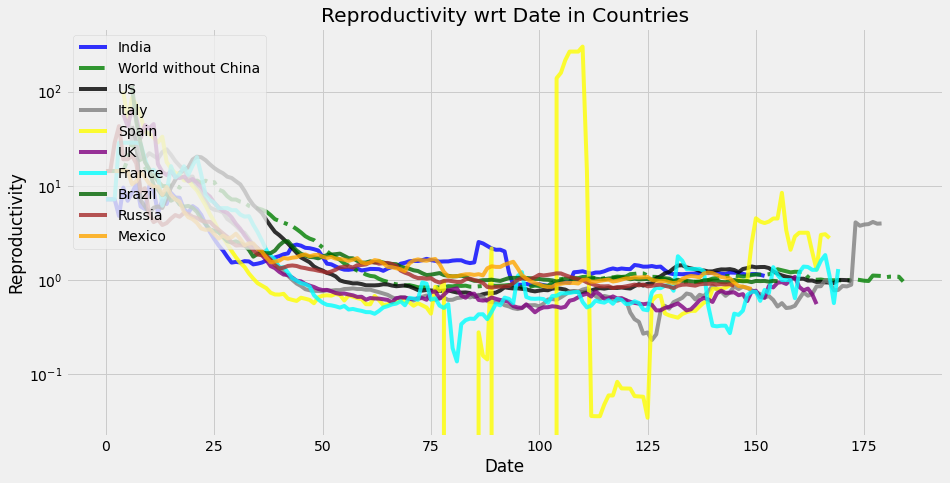

In [24]:
RF = days100(Reproductivity)#.tail(100)
plotter(RF[[cun for cun in Countries if cun not in ['China', 'World']]], 'Reproductivity', col = 'all')

In [25]:
LastDay_DF.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'World',
       'World without China'],
      dtype='object', name='Country', length=190)

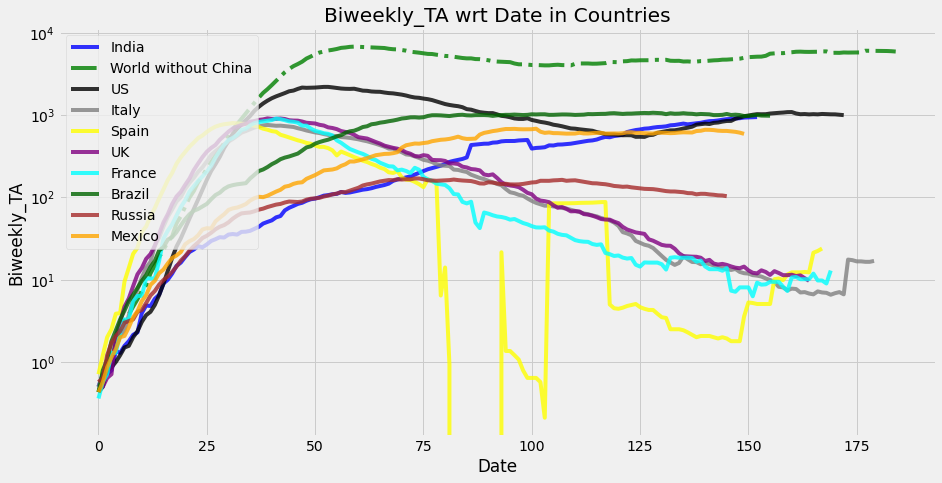

In [26]:
BD = days100(Biweekly_Deaths)
plotter(BD[[cun for cun in Countries if cun not in ['China', 'World']]], 'Biweekly_TA', col = 'all')

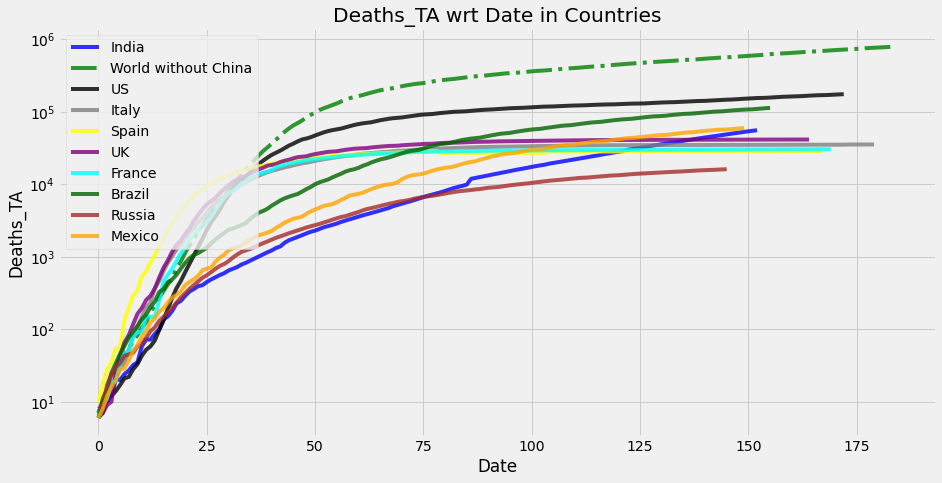

In [27]:
D = days100(Deaths)
plotter(D[[cun for cun in Countries if cun not in ['China', 'World']]], 'Deaths_TA', col = 'all')

In [28]:
def TA(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [0 for _ in range(len(X[col]) - len(L))]
    return X

In [29]:
def csvify(X, name):
    DF = X.copy()
    DF['Date'] = DF.index
    DF = pd.melt(DF, id_vars = 'Date')
    DF.to_csv(f'CSVs\\{name}.csv', index = False)

In [30]:
for name, df in {'Deaths': Deaths, 
           'BiweeklyDeaths': Biweekly_Deaths,
           'Daily_Deaths': Daily_Deaths,
           'Reproductivity': Reproductivity,
          }.items():
    csvify(df, name)
    csvify(TA(df), 'TA_' + name)

In [31]:
LastDay_DF.sort_values('Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,799245,5940.14,5553,6112,5547,0.9584
World without China,794536,5938.14,5552,6111,5547,0.9587
US,175363,1001.14,987,1181,1108,0.9658
Brazil,113358,984.71,976,1157,1054,0.9622
Mexico,59610,592.79,529,612,504,0.7969
India,55794,948.29,965,969,945,1.0964
UK,41491,9.71,7,8,2,0.5507
Italy,35427,16.93,28,7,9,3.9604
France,30508,12.93,14,25,74,1.2975


In [32]:
LastDay_DF.sort_values('Weekly Deaths', ascending = False).head(10)

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
World,799245,5940.14,5553,6112,5547,0.9584
World without China,794536,5938.14,5552,6111,5547,0.9587
US,175363,1001.14,987,1181,1108,0.9658
Brazil,113358,984.71,976,1157,1054,0.9622
India,55794,948.29,965,969,945,1.0964
Mexico,59610,592.79,529,612,504,0.7969
Colombia,16568,308.43,297,316,385,0.9592
South Africa,12843,209.57,184,193,225,0.7449
Argentina,6730,165.64,172,227,213,1.2536


In [33]:
LastDay_DF[(LastDay_DF['Reproductive Factor']>.8) & (LastDay_DF['Weekly Deaths']>100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Argentina,6730,165.64,172,227,213,1.2536
Brazil,113358,984.71,976,1157,1054,0.9622
Colombia,16568,308.43,297,316,385,0.9592
India,55794,948.29,965,969,945,1.0964
Iran,20376,160.29,149,135,112,0.8045
Peru,27034,456.07,168,184,200,0.8119
US,175363,1001.14,987,1181,1108,0.9658
World,799245,5940.14,5553,6112,5547,0.9584
World without China,794536,5938.14,5552,6111,5547,0.9587


In [34]:
LastDay_DF[(LastDay_DF['Weekly Deaths'] == 0) & (LastDay_DF.Deaths > 100)]

,Deaths,Biweekly Deaths,Weekly Deaths,Triday Deaths,Daily Deaths,Reproductive Factor
Country,,,,,,
Denmark,621,0.29,0,0,0,0.0
Finland,334,0.21,0,0,0,0.0
Ireland,1776,0.29,0,0,0,0.0
Luxembourg,124,0.36,0,0,0,0.0
Malaysia,125,0.00,0,0,0,0.0
Mali,125,0.00,0,0,0,0.0
Mauritania,158,0.07,0,0,0,NaN
Norway,264,0.57,0,1,0,0.0
Qatar,193,0.93,0,0,0,0.0


In [35]:
dt.datetime.now()

datetime.datetime(2020, 8, 22, 19, 52, 5, 945160)